## Imports

In [1]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import json

## Configurations

In [2]:
folder_raw_data = Path(os.getcwd()).parent / 'data' / 'raw'
folder_preprocessed_data = Path(os.getcwd()).parent / 'data' / 'preprocessed'

## Load Data into Dataframes
https://www.efv.admin.ch/efv/de/home/themen/finanzstatistik/daten.html#-826253434

### Alle Gemeinden nach GFS-Modell
http://www.data.efv.admin.ch/Finanzstatistik/d/gfs/gdn.xlsx

Aggregierte Zahlen aller Gemeinden, ohne Bund- und Kantonsfinanzen

In [3]:
sheet_names_gfs = [
    'vermoegen', 'aufwand', 'ertrag', 'anlage', 'ausgaben_funk',
    'einnahmen_funk', 'schuld'
]

In [4]:
df_alle_gemeinden_all = pd.read_excel(folder_raw_data / 'gdn.xlsx',
                                      sheet_name=sheet_names_gfs,
                                      header=6)

In [5]:
df_alle_gemeinden_all['ausgaben_funk']

,Unnamed: 0,1 000 CHF,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,7,Ausgaben,2.629024e+07,2.934042e+07,3.111530e+07,3.170983e+07,3.219692e+07,3.279409e+07,3.261110e+07,3.251666e+07,...,4.239696e+07,4.294077e+07,4.352182e+07,4.423845e+07,4.540734e+07,4.671449e+07,4.663083e+07,4.716166e+07,4.839678e+07,4.903988e+07
1,701,Allgemeine öffentliche Verwaltung,5.167795e+06,5.664288e+06,6.165424e+06,6.415273e+06,6.569521e+06,6.782574e+06,6.594442e+06,6.601740e+06,...,7.118189e+06,7.155021e+06,7.155197e+06,6.969599e+06,7.014471e+06,7.738869e+06,7.170712e+06,7.051258e+06,7.445518e+06,7.419301e+06
2,7011,"Legislative, Exekutive, Finanz- und Steuerverw...",1.056112e+06,1.142160e+06,1.222670e+06,1.269301e+06,1.244982e+06,1.286236e+06,1.312142e+06,1.316613e+06,...,1.514729e+06,1.517820e+06,1.601000e+06,1.596001e+06,1.672163e+06,1.746383e+06,1.758557e+06,1.829162e+06,1.821603e+06,1.851968e+06
3,7012,Wirtschaftliche Auslandhilfe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7013,Allgemeine Dienste,2.490666e+06,2.610895e+06,2.722819e+06,2.732556e+06,2.879591e+06,2.947693e+06,2.795152e+06,2.850337e+06,...,3.634245e+06,3.739360e+06,3.781171e+06,3.991470e+06,4.009412e+06,4.729403e+06,4.199829e+06,4.138385e+06,4.630062e+06,4.567172e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7105,Arbeitslosigkeit,4.021389e+04,5.120148e+04,7.232579e+04,1.531966e+05,2.416692e+05,2.730237e+05,3.005105e+05,3.046348e+05,...,1.693960e+05,1.817770e+05,1.834007e+05,1.770540e+05,1.700645e+05,1.800219e+05,1.661422e+05,1.804396e+05,1.705614e+05,1.719297e+05
76,7106,Soziales Wohnungswesen,8.574897e+04,1.273023e+05,1.356871e+05,1.287183e+05,1.255836e+05,1.317328e+05,6.464486e+04,5.861017e+04,...,3.170745e+04,4.603747e+04,5.607414e+04,5.229361e+04,3.191387e+04,3.309533e+04,3.148079e+04,3.279819e+04,3.338939e+04,3.330622e+04
77,7107,Sozialhilfe und Asylwesen,9.669922e+05,1.248401e+06,1.420264e+06,1.598499e+06,1.790045e+06,1.872644e+06,1.924851e+06,2.006075e+06,...,3.446334e+06,3.615980e+06,3.739622e+06,3.895609e+06,4.035263e+06,4.142554e+06,4.287255e+06,4.398036e+06,4.496677e+06,4.657696e+06
78,7108,F-E im Bereich der sozialen Sicherheit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Gemeinden einzeln ab 5000
http://www.data.efv.admin.ch/Finanzstatistik/d/fs_gdn/gdn_ab_5000.csv

352 of 2255 Gemeinden total

In [6]:
df_gemeinden_5000 = pd.read_csv(folder_raw_data / 'gdn_ab_5000.csv',
                                sep=';',
                                engine='python')

In [7]:
len(df_gemeinden_5000['gemeinde'].unique())

352

In [8]:
df_gemeinden_5000

,jahr,nr,gemeinde,konto,funktion,betrag
0,2008,10002,Affoltern a.A.,100,NaN,10382741.47
1,2008,10002,Affoltern a.A.,101,NaN,15175599.48
2,2008,10002,Affoltern a.A.,104,NaN,660448.70
3,2008,10002,Affoltern a.A.,106,NaN,92668.55
4,2008,10002,Affoltern a.A.,107,NaN,150500.00
...,...,...,...,...,...,...
910174,2017,266800,Porrentruy,671,71.0,93762.00
910175,2017,266800,Porrentruy,671,79.0,7997.45
910176,2017,266800,Porrentruy,675,2.0,186000.00
910177,2017,266800,Porrentruy,675,79.0,5000.00


### Gemeinden je Kanton aggregiert 

In [9]:
# sheet_names_cantons_all = [
#     'bilanz', 'er', 'aufwand', 'ertrag', 'fir', 'ausgaben', 'einnahmen', 'ausgaben_funk',
#     'einnahmen_funk', 'ord_ausgaben_funk', 'ord_einnahmen_funk'
# ]

In [184]:
funkt_id_map = {
    '0': 'Allgemeine Verwaltung',
    '01': 'Legislative und Exekutive',
    '02': 'Allgemeine Dienste',
    '03': 'Beziehungen zum Ausland',
    '08': 'F&E in allgemeine Verwaltung',
    '1': 'Öffentliche Ordnung und Sicherheit, Verteidigung',
    '11': 'Öffentliche Sicherheit',
    '12': 'Rechtssprechung',
    '13': 'Strafvollzug',
    '14': 'Allgemeines Rechtswesen',
    '15': 'Feuerwehr',
    '16': 'Verteidigung',
    '18': 'F&E in Öffentliche Ordnung und Sicherheit, Verteidigung',
    '2': 'Bildung',
    '21': 'Obligatorische Schule',
    '22': 'Sonderschulen',
    '23': 'Berufliche Grundbildung',
    '25': 'Allgemeinbildende Schulen',
    '26': 'Höhere Berufsbildung',
    '27': 'Hochschulen',
    '28': 'Forschung',
    '29': 'Übriges Bildungswesen',
    '3': 'Kultur, Sport und Freizeit, Kirche',
    '31': 'Kulturerbe',
    '32': 'Kultur, übrige',
    '33': 'Medien',
    '34': 'Sport und Freizeit',
    '35': 'Kirchen und religiöse Angelegenheiten',
    '38': 'F&E in Kultur, Sport und Freizeit, Kirche',
    '4': 'Gesundheit',
    '41': 'Spitäler, Kranken- und Pflegeheime',
    '42': 'Ambulante Krankenpflege',
    '43': 'Gesundheitsprävention',
    '48': 'F&E in Gesundheit',
    '49': 'Gesundheitswesen n.a.g.',
    '5': 'Soziale Sicherheit',
    '51': 'Krankheit und Unfall',
    '52': 'Invalidität',
    '53': 'Alter + Hinterlassene',
    '54': 'Familie und Jugend',
    '55': 'Arbeitslosigkeit',
    '56': 'Sozialer Wohnungsbau',
    '57': 'Sozialhilfe und Asylwesen',
    '58': 'F&E in soziale Sicherheit',
    '59': 'Soziale Wohlfahrt n.a.g.',
    '6': 'Verkehr und Nachrichtenübermittlung',
    '61': 'Strassenverkehr',
    '62': 'Öffentlicher Verkehr',
    '63': 'Verkehr, übrige',
    '64': 'Nachrichtenübermittlung',
    '68': 'F&E in Verkehr und Nachrichtenübermittlung',
    '7': 'Umweltschutz und Raumordnung',
    '71': 'Wasserversorgung',
    '72': 'Abwasserbeseitigung',
    '73': 'Abfallwirtschaft',
    '74': 'Verbauungen',
    '75': 'Arten- und Landschaftsschutz',
    '76': 'Bekämpfung von Umweltverschmutzung',
    '77': 'Übriger Umweltschutz',
    '78': 'F&E in Umweltschutz',
    '79': 'Raumordnung',
    '8': 'Volkswirtschaft',
    '81': 'Landwirtschaft',
    '82': 'Forstwirtschaft',
    '83': 'Jagd und Fischerei',
    '84': 'Tourismus',
    '85': 'Industrie, Gewerbe, Handel',
    '86': 'Banken und Versicherungen',
    '87': 'Brennstoffe und Energie',
    '88': 'F&E in Volkswirtschaft',
    '89': 'Sonstige gewerbliche Betriebe',
    '9': 'Finanzen und Steuern',
    '91': 'Steuern',
    '92': 'Steuerabkommen',
    '93': 'Finanz- und Lastenausgleich',
    '94': 'Ertragsanteile an Bundeseinnahmen ohne Zweckbindung',
    '95': 'Ertragsanteile, übrige, ohne Zweckbindung',
    '96': 'Vermögens- und Schuldenverwaltung',
    '97': 'Rückverteilungen',
    '99': 'Nicht aufgeteilte Posten'
}

In [185]:
header_row = [
    'funkt_id', 'funktion', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
    1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
]
column_dtypes = {'Unnamed: 0': np.unicode_}

In [186]:
def reformat_dataframe(df, canton_initials):
    '''
    Prepare the dataframe and then switch axis to create a timeseries.
    '''
    df.columns = header_row
#     df = df[df['funkt_id'].apply(lambda x: len(str(x)) ==2)]
    df.drop('funktion', axis=1, inplace=True)
    df.set_index('funkt_id', inplace=True)
    del df.index.name

    # Swap axis
    df = df.T

    # Add canton initials for multiindex
    df['canton'] = canton_initials
    return df

In [187]:
ausgaben_list = []
einnahmen_list = []

for raw_file in (folder_raw_data / 'kantone').iterdir():
    if raw_file.suffix == '.xlsx':
        dataframes_canton = pd.read_excel(
            raw_file,
            sheet_name=['ausgaben_funk', 'einnahmen_funk'],
            header=6,
            dtype=column_dtypes)

        df_ausgaben = dataframes_canton['ausgaben_funk']
        df_einnahmen = dataframes_canton['einnahmen_funk']

        canton_initials = raw_file.stem[-2:]
        df_ausgaben = reformat_dataframe(df_ausgaben, canton_initials)
        df_einnahmen = reformat_dataframe(df_einnahmen, canton_initials)

        ausgaben_list.append(df_ausgaben)
        einnahmen_list.append(df_einnahmen)

df_ausgaben_all = pd.concat(ausgaben_list)
df_einnahmen_all = pd.concat(einnahmen_list)

# Population Size
https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/stand-entwicklung.assetdetail.9486033.html

In [188]:
canton_iso_mapping = {
    'Zürich': 'zh',
    'Bern': 'be',
    'Luzern': 'lu',
    'Uri': 'ur',
    'Schwyz': 'sz',
    'Obwalden': 'ow',
    'Nidwalden': 'nw',
    'Glarus': 'gl',
    'Zug': 'zg',
    'Freiburg': 'fr',
    'Solothurn': 'so',
    'Basel-Landschaft': 'bs',
    'Basel-Stadt': 'bl',
    'Schaffhausen': 'sh',
    'Appenzell A.Rh.': 'ar',
    'Appenzell I.Rh.': 'ai',
    'St.Gallen': 'sg',
    'Graubünden': 'gr',
    'Aargau': 'ag',
    'Thurgau': 'tg',
    'Tessin': 'ti',
    'Waadt': 'vd',
    'Wallis': 'vs',
    'Neuenburg': 'ne',
    'Genf': 'ge',
    'Jura': 'ju'
}

In [189]:
year_range_old = [str(y) for y in range(1991,2010+1)]
year_range_new = [str(y) for y in range(2011,2018+1)]

#Format switches between 2010 and 2011xlsx_population_old_2011 = pd.read_excel(
xlsx_population_old = pd.read_excel(folder_raw_data / 'su-d-01.02.04.04.xlsx',
                                    header=5,
                                    sheet_name=year_range_old)
xlsx_population_new = pd.read_excel(folder_raw_data / 'su-d-01.02.04.04.xlsx',
                                    header=4,
                                    sheet_name=year_range_new)
xlsx_population_old.update(xlsx_population_new)
xlsx_population =  xlsx_population_old

In [190]:
header = [
    'canton', 'population', 'birth', 'death','birth_delta', 'migration_international',
    'migration_national', 'year'
]
df_population = pd.DataFrame(columns=header)
for year in year_range_old + year_range_new:
    df_population_temp = xlsx_population[year].iloc[0:26,0:7]
    df_population_temp.columns = header[:-1]
    df_population_temp['year'] = year
    df_population_temp['canton'] = df_population_temp['canton'].apply(lambda x : canton_iso_mapping[x])
    df_population = df_population.append(df_population_temp, ignore_index=True)
df_population.drop(['birth_delta'], axis=1, inplace=True)
df_population

,canton,population,birth,death,migration_international,migration_national,year
0,zh,1143249.0,13067.0,10807.0,9204.0,-2961.0,1991
1,be,942425.0,11388.0,9607.0,5985.0,-566.0,1991
2,lu,321424.0,4615.0,2799.0,3088.0,-288.0,1991
3,ur,35029.0,445.0,309.0,257.0,-59.0,1991
4,sz,111075.0,1621.0,910.0,1205.0,562.0,1991
...,...,...,...,...,...,...,...
723,vd,793129.0,8736.0,5750.0,4327.0,-1437.0,2018
724,vs,341463.0,3326.0,2724.0,907.0,1316.0,2018
725,ne,177964.0,1656.0,1601.0,244.0,-1217.0,2018
726,ge,495249.0,5353.0,3385.0,4953.0,-1978.0,2018


# Join Population with Financial Data

In [191]:
def join_pop(df, df_population):
    df = df.reset_index()
    df['index'] = df['index'].apply(str)
    df = pd.merge(df_population,df,left_on=['year','canton'], right_on=['index','canton'])
    df.drop(columns=['index'],inplace=True)
    return df

In [192]:
df_ausgaben_all_merged = join_pop(df_ausgaben_all, df_population)
df_einnahmen_all_merged = join_pop(df_einnahmen_all, df_population)

# Plots

In [195]:
def plot_feature_on_multiple_cantons(df,
                                     feature,
                                     cantons,
                                     min_max_normalize=False):
    fig = plt.figure(figsize=(15, 10))
    for canton in cantons:
        feature_column = df[df['canton'] == canton][feature]
        if min_max_normalize:
            feature_column = (feature_column - feature_column.min()) / (
                feature_column.max() - feature_column.min())
        plt.plot(feature_column.index,
                 feature_column,
                 marker='o',
                 label=canton)
    plt.legend()
    plt.title(funkt_id_map[feature])
    plt.show()

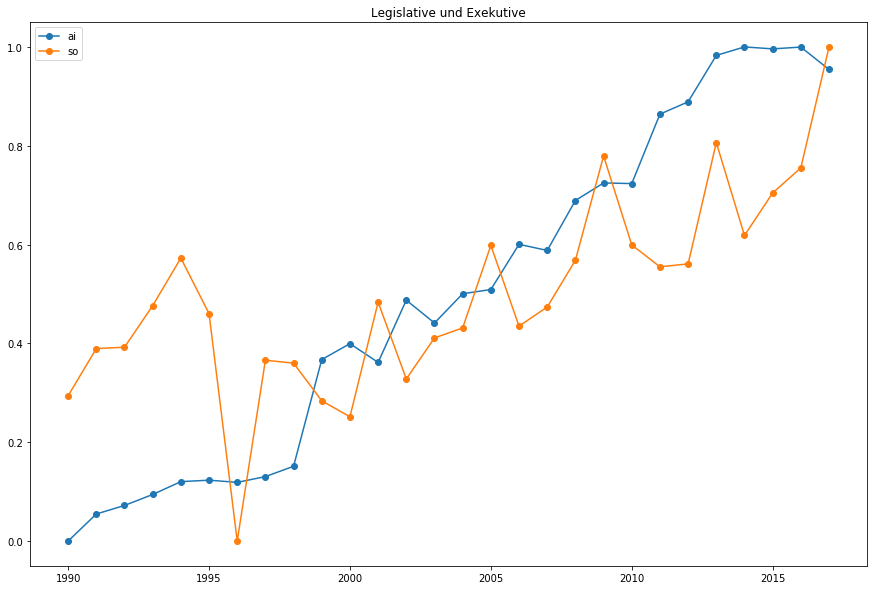

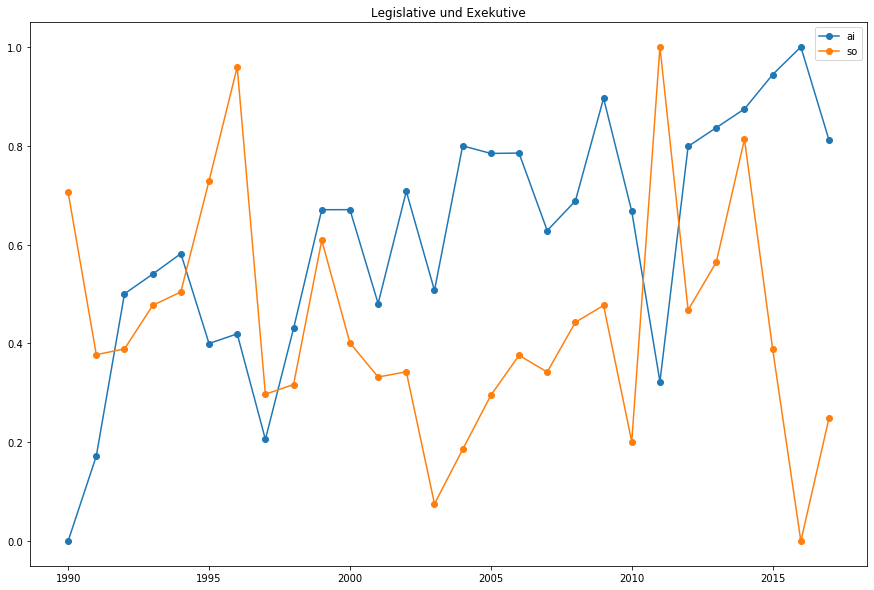

In [196]:
plot_feature_on_multiple_cantons(df_ausgaben_all, '01', ['ai', 'so'], True)

plot_feature_on_multiple_cantons(df_einnahmen_all, '01', ['ai', 'so'], True)

# Save preprocessed data

Drop nan column(s)

In [200]:
# df_ausgaben_all_merged = df_ausgaben_all_merged.loc[: , df_ausgaben_all_merged.columns.notnull()]
# df_einnahmen_all_merged = df_einnahmen_all_merged.loc[: , df_ausgaben_all_merged.columns.notnull()]

Save Dataframes as CSV

In [208]:
df_ausgaben_all_merged.to_csv(folder_preprocessed_data / 'df_ausgaben_all_merged.csv')
df_einnahmen_all_merged.to_csv(folder_preprocessed_data / 'df_einnahmen_all_merged.csv')

Funktion to ID mapping dictionary as JSON

In [202]:
with open(folder_preprocessed_data/'funkt_id_map.json', 'w') as file:
    file.write(json.dumps(funkt_id_map))